
# Decision Trees and Random Forests in Python

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv') # CSV - Comma Separated Value - filename.csv(1GB) or filename.xlsx(10GB)

In [3]:
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

## EDA

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


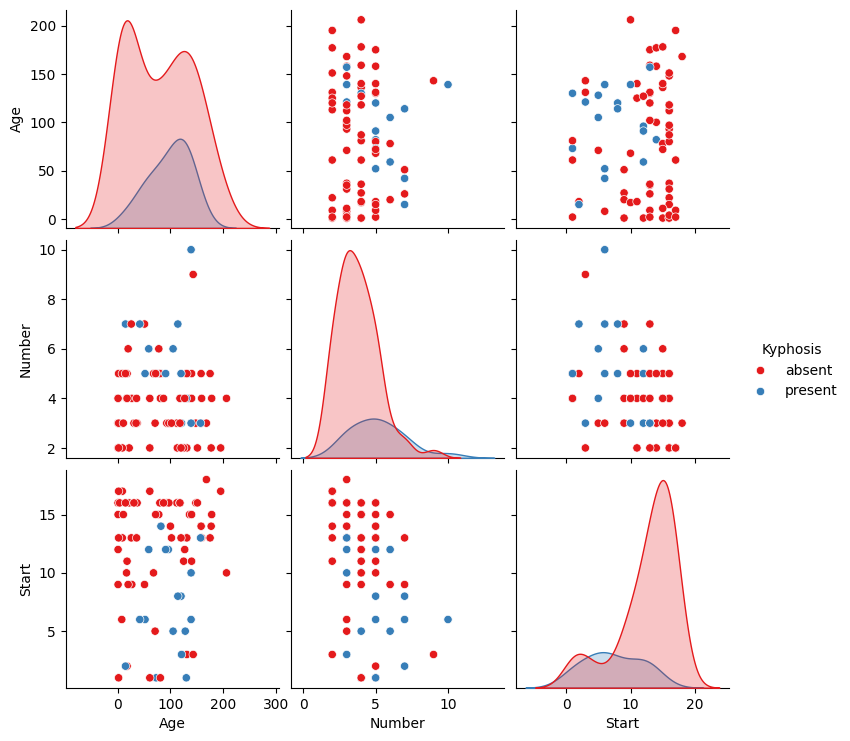

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
len(X)

81

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
len(y_train)

64

In [12]:
len(y_test)

17

## Decision Trees

In [13]:
from sklearn.tree import DecisionTreeClassifier # DecisionTreeRegressor

In [14]:
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

1. Training Accuracy - X_train, y_train 
2. Testing Accuracy - X_test, y_test

Overfitting - 
    Training accuracy - 80
    Testing accuracy - 95
    Model is overfitted

Underfitting - 
    Training accuracy - 80
    Testing accuracy - 65
    Model underfitting

Training and Testing accuracy = +- 5
Optimal Model
    Training accuracy - 80
    Testing accuracy - 75

In [16]:
predictions = dtree.predict(X_test)

In [17]:
predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'present'], dtype=object)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.85      0.79      0.81        14
     present       0.25      0.33      0.29         3

    accuracy                           0.71        17
   macro avg       0.55      0.56      0.55        17
weighted avg       0.74      0.71      0.72        17



In [23]:
print(confusion_matrix(y_test,predictions))

[[11  3]
 [ 2  1]]


## Random Forests

In [18]:
from sklearn.ensemble import RandomForestClassifier # RandomForestRegressor

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
rfc_pred = rfc.predict(X_test)

In [20]:
rfc_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'present'], dtype=object)

In [24]:
print(confusion_matrix(y_test,rfc_pred))

[[13  1]
 [ 2  1]]


In [25]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.87      0.93      0.90        14
     present       0.50      0.33      0.40         3

    accuracy                           0.82        17
   macro avg       0.68      0.63      0.65        17
weighted avg       0.80      0.82      0.81        17

